# 3주차 이미지 라벨링
- 이미지에 영역을 표시하고 이름을 적어봅시다
- Pascal VOC 포맷과 YOLO 포맷의 차이를 오픈소스를 통해 확인하고 상호 변환을 해봅니다

In [ ]:
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
! tar xvf VOCtrainval_11-May-2012.tar

# VCC2012 데이터셋 소개
- 2주차에 넘어갔던 데이터셋 소개를 다시 제대로 해보려고 합니다
- http://host.robots.ox.ac.uk/pascal/VOC/voc2012/ 에 들어가보아도 소개가 되어있지만 아래와 같이 정리해보았습니다

## Annotations
- 바로 오늘 할 내용입니다
- 이미지 내에 위치한 오브젝트들의 bounding box 정보를 표기한 xml 파일 입니다

In [ ]:
! echo annotations
! find /content/VOCdevkit/VOC2012/Annotations -name "*.xml" | wc -l
! echo
! echo JPEGImages
! find /content/VOCdevkit/VOC2012/JPEGImages -name "*.jpg" | wc -l

## ImageSets
- 대회 종목(?)별로 train 데이터세트와 validation 데이터세트가 정의된 텍스트 파일입니다

- Action
  - 사람의 행동을 식별하기하는 모델 학습을 위한 데이터세트가 정의된 텍스트파일
  - http://host.robots.ox.ac.uk/pascal/VOC/voc2012/actionexamples/index.html

- Layout
  - 사람의 머리, 손, 발을 식별하는 모델 학습을 위한 데이터세트가 정의된 텍스트파일
  - http://host.robots.ox.ac.uk/pascal/VOC/voc2012/layoutexamples/index.html

- Main
  - 우리가 6주동안 증강할 Object Detection & Classification 모델 학습을 위한 데이터세트가 정의된 텍스트파일
  - http://host.robots.ox.ac.uk/pascal/VOC/voc2012/htmldoc/devkit_doc.html#SECTION00031000000000000000

- Segmentation
  - 오브젝트의 영역을 픽셀단위로 식별하여 색깔로 구분하는 모델 학습을 위한 데이터세트가 정의된 텍스트파일
  - http://host.robots.ox.ac.uk/pascal/VOC/voc2012/segexamples/index.html

In [ ]:
# 오브젝트별로 갯수를 세어봅시다. 똑같나요? 왜그럴까요?
! echo aeroplane
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/aeroplane_train.txt | wc -l
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/aeroplane_val.txt | wc -l
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/aeroplane_trainval.txt | wc -l
! echo
! echo person
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/person_train.txt | wc -l
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/person_val.txt | wc -l
! cat /content/VOCdevkit/VOC2012/ImageSets/Main/person_trainval.txt | wc -l

## SegmentationClass
- 클래스별로 구분된 segmentation mask 입니다
- SegmentationObject와 다른점은 같은 클래스면 다른 오브젝트더라도 같은 색으로 마스킹된 것입니다

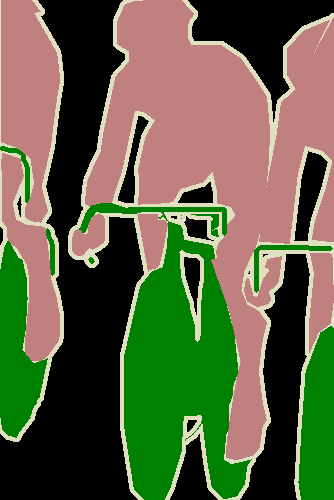

## JPEGImages
- 1주차부터 가지고 놀았던(?) 이미지들이 있습니다
- 테스트 데이터 세트는 www.flickr.com 에서 가져온 이미지도 있다고 합니다

## SegmentationObject
- 오브젝트별로 구분된 segmentation mask 입니다
- segmentation mask란 실제 오브젝트가 위치한 영역을 픽셀별로 일일이 표시한 것을 의미합니다
- 따라서 숫자로 표기하지 않고 이미지위에 해당 오브젝트가 위치한 픽셀에 색깔로 표시된 png 파일이 존재합니다
- 이미지상에 같은 클래스의 오브젝트가 2개 이상 있으면 각각 다른 색으로 마스킹 됩니다
- 4주차에 이 마스킹을 이용해서 배경과 사물 합성을 진행합니다

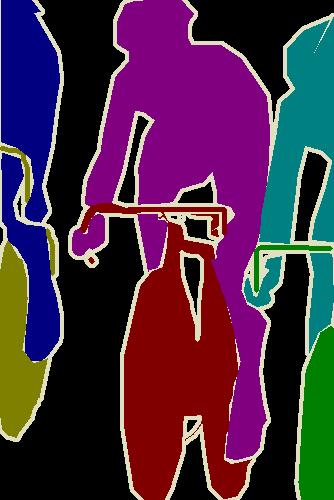

# 이미지 라벨링이 무엇인가요?
- ground truth와 class 를 annotation file에 표시

### ground truth?
- 실측정보라고 하네요
- 아래 이미지는 ground truth를 마킹하고 있나요?

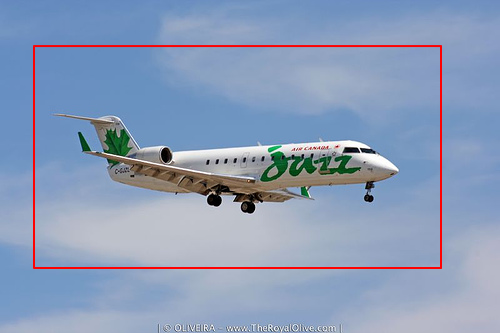



- 아래 이미지는 어떤가요? ground truth를 마킹하고 있나요? 정말요?

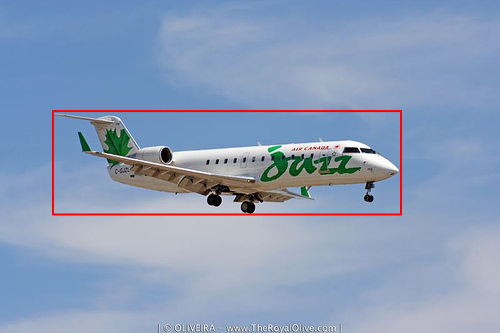

### class
- 어떤 오브젝트인지 정의합니다
- 비행기? 비행기 맞나요?
  - CRJ200 기종이 아닌가요?
  - Air Canada Jazz 소속 항공기가 아닌가요?
  - 뭐가 맞는거죠?

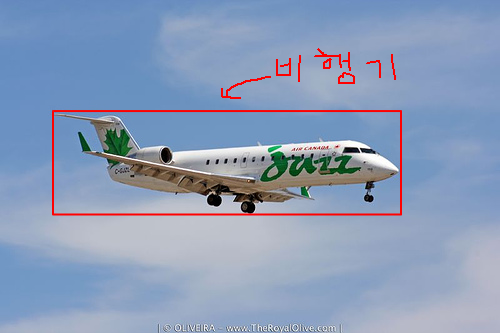

### annotaion file
- 위에 붉은색 테두리는 어디에 그리죠?
  - 그림위에 그리면 그림이 변형되겠지요
- 오브젝트 이름은 저렇게 쓰면(?) 될까요?
  - 이름을 그림위에 쓰면 그림이 변형되겠지요
- 그래서 별도의 텍스트파일에 기록합니다
  - 아래처럼 기록해도 annotation file로 인정할 수 있습니다
  - 전제조건
    - 가져다 쓰는 쪽과 이렇게 약속이 되어있다면요
    - 괄호안에 좌표가 들어있는데 순서는 왼쪽위부터 시계방향으로 4개 꼭지점이고 사각형 테두리 안에 ??? 가 있어요 라고 오브젝트 이름을 표현

> 왼쪽 위(52,113), 오른쪽 위(403,113), 오른쪽 아래(403, 215), 왼쪽 아래(52,215) 를 꼭지점으로 하는 사각형 테두리 안에 비행기가 있어요
- 그래서 약속된 포맷으로 기록합니다
  - 예를 들면 xml 포맷 → Pascal VOC

# Pascal VOC 포맷
- 2012년까지 진행되었던 Pascal Visual Object Challenge 에서 사용된 라벨링 포맷
- 실제로 쓰이는 것은 size.width, size.height, annotation.object.name, annotation.object.bndbox

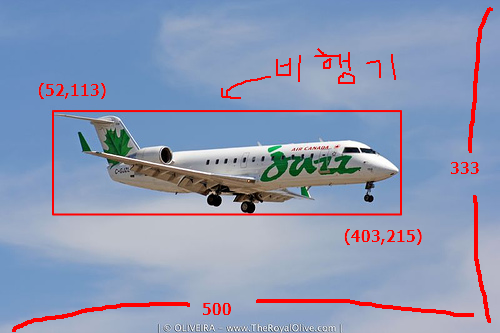

```xml
<annotation>
	<filename>2010_005213.jpg</filename>
	<folder>VOC2012</folder>
	<object>
		<name>aeroplane</name>
		<bndbox>
			<xmin>52</xmin>
            <ymin>113</ymin>
            <xmax>403</xmax>
			<ymax>215</ymax>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
	</object>
	<segmented>0</segmented>
	<size>
		<depth>3</depth>
		<height>333</height>
		<width>500</width>
	</size>
	<source>
		<annotation>PASCAL VOC2010</annotation>
		<database>The VOC2010 Database</database>
		<image>flickr</image>
	</source>
</annotation>
```

## Pascal VOC 포맷의 annotation 을 읽어서 이미지 위에 표시해봅시다
- xml 파싱방법을 알아야 하겠네요
- 이미지 위에 네모 그리는 방법도 알아야 하겠네요
- 이미지 위에 글씨를 쓰는 방법도 알아야 하겠네요
- 아래 xml을 파싱하고 해당 이미지 위에 표시해볼게요

In [ ]:
! cat /content/VOCdevkit/VOC2012/Annotations/2010_003933.xml

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

# jpg 파일과 xml 파일에서 확장자를 빼면 이름이 같아야 합니다
image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2010_003933.jpg')

with open ('/content/VOCdevkit/VOC2012/Annotations/2010_003933.xml', 'r', encoding='utf8') as xml:

    # xml을 읽어서 메모리에 올립니다
    # json파일을 로드해서 dict로 올린거랑 비슷한 상황이라고 보시면 됩니다
    tree = Et.parse(xml)
    
    # 최상위 오브젝트를 찾습니다
    root = tree.getroot()

    # 최상위 오프젝트로부터 하위 오브젝트를 찾아나갑니다
    # Pascal VOC 포맷에서 아래 키들은 하나씩만 존재하므로 findall이 아니라 find를 사용합니다
    # ground trugh와 class를 표시하는데 그닥 도움은 안되지만 일단 읽어봅시다
    # 왜 필요가 없을까요? 아래 정보는 이미지를 읽을때 라벨링 없이 모두 획득 가능한 정보이기 때문입니다
    size = root.find("size")
    width = size.find("width").text
    height = size.find("height").text
    channels = size.find("depth").text    
    file_name = root.find("filename").text

    print("width : {}\nheight : {}\nchannels : {}\n".format(file_name,width, height, channels))

    # 여기서부터가 진짜 라벨링에 필요한 내용입니다
    # Pascal VOC포맷에서 object라는 키는 라벨링된 오브젝트의 수만큰 복수로 존재하므로 findall을 사용하고 iterator를 돌립니다
    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        # 이미지 위에 네모를 그립니다
        # 네모를 정의할때에는 좌상단 좌표와 우하단 좌표만 있으면 가능합니다
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        # 이미지 위에 글씨를 씁니다
        # 글씨를 쓰기 시작하는 좌표의 지정이 필요합니다
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_PLAIN , 2, (255,0,255))

        print("class : {}\nxmin : {}\nymin : {}\nxmax : {}\nymax : {}\n".format(name, xmin, ymin, xmax, ymax))
        

if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 해당 Annotation 내용을 bash 명령어로 다시 확인해봅시다

In [ ]:
! cat /content/VOCdevkit/VOC2012/Annotations/2010_003933.xml

## xml 파일을 수정해서 엔진과 랜딩기어를 라벨링 해봅시다
- 그리고 새로 생긴 오브젝트 영역을 이미지 위에 그려봅시다
- 위의 코드에서 어디를 수정하면 될까요?

```xml
<annotation>
	<filename>2010_003933.jpg</filename>
	<folder>VOC2012</folder>
	<object>
		<name>aeroplane</name>
		<bndbox>
			<xmax>500</xmax>
			<xmin>4</xmin>
			<ymax>284</ymax>
			<ymin>67</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Left</pose>
		<truncated>1</truncated>
	</object>
	<!-- 여기까지 원본   -->

	<!-- 여기서부터는 추가한 내용   -->
    <!-- 엔진을 추가합니다  -->
	<object>
		<name>engine</name>
		<bndbox>
			<xmax>170</xmax>
			<xmin>65</xmin>
			<ymax>230</ymax>
			<ymin>154</ymin>
		</bndbox>
		<difficult>0</difficult>
		<!-- 이 값은 왜 1로 했을까요?  가려져서 -->
		<occluded>1</occluded>
		<!-- 이 값은 왜 안바꾸고 놔둘까요? 뷰포인트가 동체와 동일해서  -->
		<pose>Left</pose>
		<!-- 이 값은 왜 0으로 했을까요? 잘린 부분이 없어서  -->
		<truncated>0</truncated>
	</object>
    
    <!-- 왼쪽 랜딩기어를 추가합니다  -->
	<object>
		<name>landing gear</name>
		<bndbox>
			<xmax>294</xmax>
			<xmin>226</xmin>
			<ymax>283</ymax>
			<ymin>248</ymin>
		</bndbox>
		<difficult>0</difficult>
		<!-- 이 값은 왜 0으로 했을까요?  -->
		<occluded>0</occluded>		
		<pose>Left</pose>
		<!-- 이 값은 왜 0으로 했을까요?  -->
		<truncated>0</truncated>
	</object>
    
    <!-- 오픈쪽 랜딩기어를 추가합니다  -->
	<object>
		<name>landing gear</name>
		<bndbox>
			<xmax>446</xmax>
			<xmin>374</xmin>
			<ymax>283</ymax>
			<ymin>251</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Left</pose>
		<truncated>0</truncated>
	</object>
	<!-- 여기까지가 추가한 내용   -->


	<!-- 여기서 부터 원본   -->
	<segmented>0</segmented>
	<size>
		<depth>3</depth>
		<height>334</height>
		<width>500</width>
	</size>
	<source>
		<annotation>PASCAL VOC2010</annotation>
		<database>The VOC2010 Database</database>
		<image>flickr</image>
	</source>
</annotation>

```

## 언제 이걸 텍스트파일에 다 기록하죠?
- 오픈소스 라벨링 도구가 있습니다
- 이 도구를 사용하는 방법은 간단히 보여드리기만 하겠습니다
- 이 오픈소스를 확인하는 목적은 Pascal VOC → YOLO 의 차이를 확인하고 포맷 변환 과정을 오픈소스의 구현부를 통해 설명하기 위함입니다

```bash
git clone https://github.com/heartexlabs/labelImg.git
pip3 install pyqt5
pyrcc5 -o libs/resources.py resources.qrc
python labelImg.py
```

## YOLO 포맷
- VOC2012 데이터셋 아무 파일이나 하나 라벨링 도구로 YOLO 포맷 변환을 해봅시다

## YOLO 포맷이 뭔가요?
- YOLO 에서 쓰는 포맷이지요... 응?
- 이렇게 되어있습니다...응??
```csv
0 0.5 0.5 0.5 0.5
```
- 이런 헤더가 숨어있다고 보시면 됩니다... 으응....응???
```csv?
class_index x_center y_center width height
0           0.5      0.5      0.5   0.5
```
- class_index: 클래스 리스트가 있다면 몇번째 리스트인지 가리키는 숫자입니다(0부터)
- x_center: 이미지 너비가 0부터 1까지 있다고 볼때 bounding box 가로 절반의 위치가 어디인지 가리키는 숫자입니다
- y_center: 이미지 높이가 0부터 1까지 있다고 볼때 bounding box 세로 절반의 위치가 어디인지 가리키는 숫자입니다
- width: bounding box의 너비 나누기 이미지의 너비
- height: bounding box의 높이 나누기 이미지의 높이

## 정규화된 값이군요!
- 이제 이걸 해석해볼 수 있겠네요
  - class 리스트가 "사람, 강아지, 고양이..." 순서로 되어있다면 0번째인 사람을 의미
  - 사람 영역의 bounding box가 이미지의 가로세로 딱 정중앙에 위치
  - 사람 영역의 bounding box가 이미지 너비의 절반, 높이의 절반 크기임
```csv
0 0.5 0.5 0.5 0.5
```
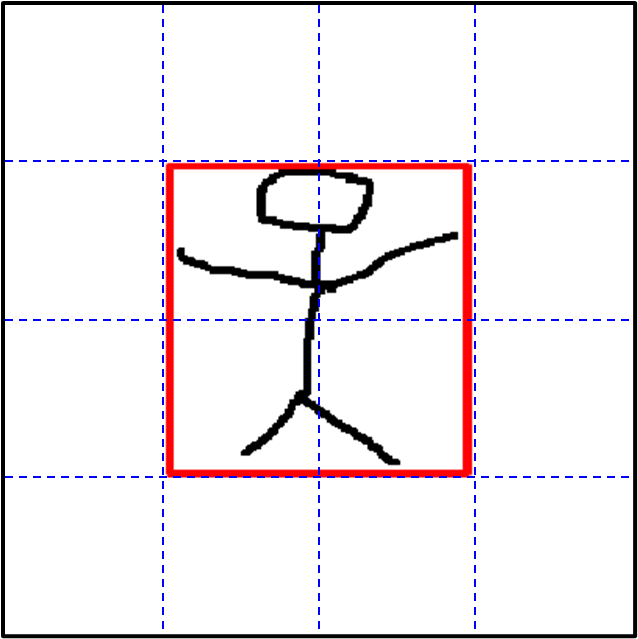

## 왜 처음부터 YOLO로 연습하지 않았죠???
- YOLO포맷의 단점, class index 파일을 분실하면 모든 라벨링 파일(txt)이 무용지물이 됩니다
- Pascal VOC 포맷은 xml만 있으면 언제든 YOLO 포맷으로 변경할 수 있습니다
- YOLO 기반의 기계학습을 진행하더라도 Pascal VOC 포맷으로 라벨링한 후에, 기계학습 진행시 YOLO 포맷으로 변경하기를 권장 합니다

## Pascal VOC → YOLO 변환을 해봅시다
- 이미지의 너비와 높이를 우선 알아야 합니다
- x_center
    - 가로 중간지점을 이미지 너비로 나눕니다
    - xmin 에서 출발해서 이미지 크기의 중간까지 가면 가로 중간지점이지요
$$
    \frac{x_{min} + \frac{x_{max} - x_{min}}{2 }}{image\_width}
$$
    
- y_center
    - 세로 중간지점을 이미지 높이로 나눕니다
$$
    \frac{y_{min}+\frac{y_{max} - y_{min}}{2 }}{image\_height}    
$$
- width
    - 오브젝트의 가로 너비를 이미지 너비로 나눕니다
$$
    \frac{x_{max} - x_{min}}{ image\_width}
$$

- height
    - 오브젝트의 세로 높이를 이미지 높이로 나눕니다
$$
    \frac{y_{max} - y_{min}}{ image\_height}
$$


## YOLO → Pascal VOC 변환을 해봅시다
- 결합은 뭐다? 분해의 역순
- image_width는 이미지를 읽으면 알게 되고, x_center, width가 주어졌으니 xmax와 xmin에 대한 연립방정식이 나오네요
- image_height는 이미지를 읽으면 알게 되고, y_center, height가 주어졌으니 ymax와 ymin에 대한 연립방정식이 나오네요
- 더이상의 자세한 설명은... 아래 오픈소스로 대신합니다

### YOLO 포맷으로 저장하는 구현부
- labelImg 오픈소스에서 아래 코드를 참조합시다
- https://github.com/heartexlabs/labelImg/blob/master/libs/yolo_io.py
> ./libs/yolo_io.py 

In [ ]:
# Tzutalin. LabelImg. Git code (2015). https://github.com/tzutalin/labelImg
class YOLOWriter:

    def __init__(self, folder_name, filename, img_size, database_src='Unknown', local_img_path=None):
        self.folder_name = folder_name
        self.filename = filename
        self.database_src = database_src
        self.img_size = img_size
        self.box_list = []
        self.local_img_path = local_img_path
        self.verified = False
        
    def save(self, class_list=[], target_file=None):

        out_file = None  # Update yolo .txt
        out_class_file = None   # Update class list .txt
        """
        if target_file is None:
            out_file = open(
            self.filename + TXT_EXT, 'w', encoding=ENCODE_METHOD)
            classes_file = os.path.join(os.path.dirname(os.path.abspath(self.filename)), "classes.txt")
            out_class_file = open(classes_file, 'w')

        else:
            out_file = codecs.open(target_file, 'w', encoding=ENCODE_METHOD)
            classes_file = os.path.join(os.path.dirname(os.path.abspath(target_file)), "classes.txt")
            out_class_file = open(classes_file, 'w')
        """
        for box in self.box_list:
            #########################################################################################
            # box 라는 것을 메모리에 들고 있다가 YOLO 포맷으로 변환을 실시합니다
            class_index, x_center, y_center, w, h = self.bnd_box_to_yolo_line(box, class_list)
            #########################################################################################
            # print (classIndex, x_center, y_center, w, h)
            out_file.write("%d %.6f %.6f %.6f %.6f\n" % (class_index, x_center, y_center, w, h))

        # print (classList)
        # print (out_class_file)
        for c in class_list:
            out_class_file.write(c+'\n')

        out_class_file.close()
        out_file.close()      

    ###########################################################################
    # xmin, xmax, ymin, ymax가 나오고 이것을 YOLO 포맷으로 변환하고 있습니다  #
    # xmin, xmax, ymin, ymax 는 Pascal VOC 포맷 용어입니다                    #
    # 즉, 이 오픈소스는 메모리에 올릴 때에은 Pascal VOC 포맷으로 올립니다     #
    ###########################################################################
    def bnd_box_to_yolo_line(self, box, class_list=[]):
        x_min = box['xmin']
        x_max = box['xmax']
        y_min = box['ymin']
        y_max = box['ymax']

        # 이것은 위에서 설명한 식이랑 다른 식일까요?
        x_center = float((x_min + x_max)) / 2 / self.img_size[1]
        y_center = float((y_min + y_max)) / 2 / self.img_size[0]

        w = float((x_max - x_min)) / self.img_size[1]
        h = float((y_max - y_min)) / self.img_size[0]

        # PR387
        box_name = box['name']
        if box_name not in class_list:
            class_list.append(box_name)

        class_index = class_list.index(box_name)

        return class_index, x_center, y_center, w, h

### 이번에는 YOLO 포맷 읽기 구현부 입니다
> ./libs/yolo_io.py

In [ ]:
# Tzutalin. LabelImg. Git code (2015). https://github.com/tzutalin/labelImg
import os

class YoloReader:

    def __init__(self, file_path, image, class_list_path=None):
        # shapes type:
        # [labbel, [(x1,y1), (x2,y2), (x3,y3), (x4,y4)], color, color, difficult]
        
        # 아래에서 읽는 이미지는 qt 라이브러리를 이용하기 때문에, 테스트할 때에는 주석처리 하고 사용합니다
        """
        self.shapes = []
        self.file_path = file_path

        if class_list_path is None:
            dir_path = os.path.dirname(os.path.realpath(self.file_path))
            self.class_list_path = os.path.join(dir_path, "classes.txt")
        else:
            self.class_list_path = class_list_path

        # print (file_path, self.class_list_path)

        classes_file = open(self.class_list_path, 'r')
        self.classes = classes_file.read().strip('\n').split('\n')

        # print (self.classes)

        img_size = [image.height(), image.width(),
                    1 if image.isGrayscale() else 3]

        self.img_size = img_size

        self.verified = False
        # try:
        self.parse_yolo_format()
        # except:
        #     pass
        """
        
        self.img_size = []



    # 실제 코드에서는 아래 함수가 먼저 등장하고 콜스택은 이 함수가 먼저 호출됩니다    
    def parse_yolo_format(self):
        bnd_box_file = open(self.file_path, 'r')
        for bndBox in bnd_box_file:
            class_index, x_center, y_center, w, h = bndBox.strip().split(' ')
            
            # 여기에서 추출되는 label, x_min, y_min, x_max, y_max 이 Pascal VOC에서 사용되는 포맷과 동일합니다
            # 즉, 이 오픈소스는 Pascal VOC 기반으로 라벨링 변수를 사용하고, 이것이 파일로 기록될 때 포맷 변환을 실시합니다
            label, x_min, y_min, x_max, y_max = self.yolo_line_to_shape(class_index, x_center, y_center, w, h)

            # Caveat: difficult flag is discarded when saved as yolo format.
            self.add_shape(label, x_min, y_min, x_max, y_max, False)
            

    ############################################################################
    # 이번에는 YOLO 포맷을 읽어서 메모리에는 xmin, xmax, ymin, ymax로 올립니다 #
    # xmin, xmax, ymin, ymax 는 Pascal VOC 포맷 용어입니다                     #
    # 즉, 이 오픈소스는 메모리에 올릴 때에은 Pascal VOC 포맷으로 올립니다      #
    ############################################################################
    def yolo_line_to_shape(self, class_index, x_center, y_center, w, h):
        label = self.classes[int(class_index)]

        # 이번에는 정말 위에서 설명한거랑 다른거 같은데요???
        # 그럼 위에서 설명한거로 바꿔볼까요?
        x_min = max(float(x_center) - float(w) / 2, 0)
        x_max = min(float(x_center) + float(w) / 2, 1)
        y_min = max(float(y_center) - float(h) / 2, 0)
        y_max = min(float(y_center) + float(h) / 2, 1)

        x_min = round(self.img_size[1] * x_min)
        x_max = round(self.img_size[1] * x_max)
        y_min = round(self.img_size[0] * y_min)
        y_max = round(self.img_size[0] * y_max)
        

        return label, x_min, y_min, x_max, y_max

## yolo_line_to_shape() 함수를 아래 내용으로 치환해봅시다
- x_max와 y_min의 연립방정식, y_max와 y_min 의 연립방정식으로 풀은 것입니다

In [ ]:
        x_min = round(self.img_size[1] * x_center - w * self.img_size[1]/2)
        y_min = round(self.img_size[0] * y_center - h * self.img_size[0]/2)
        x_max = round(w * self.img_size[1] + x_min)
        y_max = round(h * self.img_size[0] + y_min)

## 테스트로 하나 가져다 써봅시다
- 임의의 Pascal VOC 좌표를 만들고 YOLO 포맷으로 변경해봅시다
- 그러면 읽기 구현부를 참조하면 되겠군요!
- 800,600 이미지의 (100,50), (200,250) 에 aeroplain 이라는 클래스를 학습할 때의 예시

In [ ]:
# 실제로 저장할것이 아니니까 필수파라미터중 folder_name, filename은 None으로 넘깁니다
# img_size는 height, width 순서로 읽도록 구현되어 있기 때문에 (600,800) 으로 넘깁니다
yolo_writer = YOLOWriter(folder_name=None, filename=None, img_size=(600,800))

box = {}
box['xmin'] = 100.
box['ymin'] = 50
box['xmax'] = 200
box['ymax'] = 250
box['name'] = 'aeroplain'

# 3개의 class중에서 aeroplain 입니다
class_list=('bird', 'train', 'aeroplain')

yolo_writer.bnd_box_to_yolo_line(box=box, class_list=class_list)

## 이번에는 YOLO 포맷을 PascalVOC로 바꿔봅시다
- 위에서 받아온 YOLO 포맷 아웃풋을 다시 인풋으로 해서 바꿔봅시다
- 이번에는 쓰기 구현부를 참조하면 되겠군요!
- 여기서 yolo_line_to_shape() 함수 내용을 치환해 보면서 비교해봅니다

In [ ]:
# 일단 위에서 받아온 YOLO 포맷아웃풋을 변수로 올립니다
yolo_format = yolo_writer.bnd_box_to_yolo_line(box=box, class_list=class_list)

yolo_reader = YoloReader(file_path=None, image=None)
yolo_reader.classes = class_list
yolo_reader.img_size = [600,800]

class_index = yolo_format[0]
x_center = yolo_format[1]
y_center = yolo_format[2]
w = yolo_format[3]
h = yolo_format[4]

yolo_reader.yolo_line_to_shape(class_index=class_index, x_center=x_center, y_center=y_center, w=w, h=h)

## Affine transform을 이용해 Annotation 을 transform 해봅시다
- 2009_003546.jpg
- 원점을 중심으로 시계방향 90도 돌려봅시다

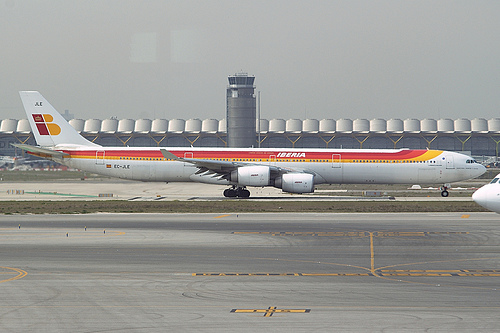

- 2주차에 했던것 처럼 matrix를 직접 만들어봅시다

In [ ]:
import cv2
import math
import numpy as np

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2009_003546.jpg')
height, width, channel = image.shape


theta = math.radians(90)

# affine matrix에 회전 matrix를 적용했습니다
# 원점 중심으로 90도 돌리면 height만큼 원점 좌측에 가 있을테니 x좌표를 height만큼 translate 해줍니다
matrix = np.float64([[np.cos(theta), -np.sin(theta), height],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0,0,1]]) # 마지막행이 (0,0,1) 이므로 affine transform 입니다

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


# 원본 이미지를 불러옵니다
image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2009_003546.jpg')
height, width, channel = image.shape

# 원본 이미지를 그리기 위해 별도로 복사합니다
org_image = image.copy()

# 원본 이미지에 원본 라벨링 영역을 그립니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2009_003546.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        org_image = cv2.rectangle(org_image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)        
        cv2.putText(org_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))
    

# 원본 이미지를 화면에 표시합니다
if colab_env:
    cv2_imshow(org_image)

else:
    cv2.imshow('aeroplains', org_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#########################################
# 여기까지는 원본 이미지 그리기         #
#########################################


# 이미지에 perspective transform을 수행하는데 행렬은 affine matrix를 넣습니다, 90도 돌릴 것이므로 표현할 이미지 크기도 높이와 너비를 바꿔줍니다
new_image = cv2.warpPerspective(image, matrix, (height, width))

# transform 된 이미지에 라벨링 영역을 그립니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2009_003546.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        
        # numpy array를 쓸거니까 y부터 서술해서 4개의 꼭지점을 구성합니다
        p0 = [xmin, ymin]
        p1 = [xmax, ymin]
        p2 = [xmax, ymax]
        p3 = [xmin, ymax]
        
        org_coordinates = np.float32([p0, p1, p2, p3])        
                
        # 4개의 꼭지점을 reshape 하는 이유는 뭘까요?
        new_coordinates = cv2.perspectiveTransform(org_coordinates.reshape(-1,1,2), matrix).reshape(org_coordinates.shape)
     
        
        # 아래 인덱스의 의미는 무엇일까요?
        # 원래는 좌측 위부터 시계방향으로 꼭지점 순서가 0 -> 1 -> 2 -> 3 이었는데 90도 돌렸다는 것을 생각해봅시다
        # xmin, ymin 은 3번 꼭지점이 가져가고 xmax, ymax는 1번 꼭지점이 가져가겠네요!
        xmin = int(new_coordinates[3][0])
        ymin = int(new_coordinates[3][1])
        xmax = int(new_coordinates[1][0])
        ymax = int(new_coordinates[1][1])
        
        
        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        cv2.putText(new_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

# transform된 이미지와 라벨링 영역을 화면에 표시합니다  
if colab_env:
    cv2_imshow(new_image)

else:
    cv2.imshow('aeroplains', new_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 돌렸으면 무엇을 해야할까요?
- 저장을 해야지요
- 이미지 저장은 우리 많이 해봤으니 라벨링 파일 저장을 배워봅시다

In [ ]:
import cv2
import math
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2009_003546.jpg')
height, width, channel = image.shape


theta = math.radians(90)

# affine matrix에 회전 matrix를 적용했습니다
# 원점 중심으로 90도 돌리면 height만큼 원점 좌측에 가 있을테니 x좌표를 height만큼 translate 해줍니다
matrix = np.float64([[np.cos(theta), -np.sin(theta), height],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0,0,1]]) # 마지막행이 (0,0,1) 이므로 affine transform 입니다


# 원본 이미지를 불러옵니다
image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2009_003546.jpg')
height, width, channel = image.shape

# 원본 이미지를 그리기 위해 별도로 복사합니다
org_image = image.copy()

# 원본 이미지에 원본 라벨링 영역을 그립니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2009_003546.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        org_image = cv2.rectangle(org_image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)        
        cv2.putText(org_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))
    

# 원본 이미지를 화면에 표시합니다
if colab_env:
    cv2_imshow(org_image)

else:
    cv2.imshow('aeroplains', org_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#########################################
# 여기까지는 원본 이미지 그리기         #
#########################################


# 이미지에 perspective transform을 수행하는데 행렬은 affine matrix를 넣습니다, 90도 돌릴 것이므로 표현할 이미지 크기도 높이와 너비를 바꿔줍니다
new_image = cv2.warpPerspective(image, matrix, (height, width))
cv2.imwrite('2009_003546_ROTATE.jpg', new_image)


# 새로운 xml 트리를 생성합니다
# 원본 오브젝트를 읽으면서 여기에 담고 원본 오브젝트르 다 읽고 나면 새로운 파일에 기록할 것입니다
new_root = Element("annotation")
new_filename = Element("filename")
new_filename.text = '2009_003546_ROTATE.jpg'

# 여기는 기존 xml 파일을 읽습니다
# 오브젝트를 하나씩 읽으면서 변환하고 새로 저장할 파일에 기록할 것입니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2009_003546.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        
        # numpy array를 쓸거니까 y부터 서술해서 4개의 꼭지점을 구성합니다
        p0 = [xmin, ymin]
        p1 = [xmax, ymin]
        p2 = [xmax, ymax]
        p3 = [xmin, ymax]
        
        org_coordinates = np.float32([p0, p1, p2, p3])        
                
        # 4개의 꼭지점을 reshape 하는 이유는 뭘까요?
        new_coordinates = cv2.perspectiveTransform(org_coordinates.reshape(-1,1,2), matrix).reshape(org_coordinates.shape)
    
        
        # 아래 인덱스의 의미는 무엇일까요?
        # 원래는 좌측 위부터 시계방향으로 꼭지점 순서가 0 -> 1 -> 2 -> 3 이었는데 90도 돌렸다는 것을 생각해봅시다
        # xmin, ymin 은 3번 꼭지점이 가져가고 xmax, ymax는 1번 꼭지점이 가져가겠네요!
        xmin = int(new_coordinates[3][0])
        ymin = int(new_coordinates[3][1])
        xmax = int(new_coordinates[1][0])
        ymax = int(new_coordinates[1][1])

        # annotation을 생성합니다            
        new_object = Element("object")
        new_bndbox = Element("bndbox")
        new_xmin = Element("xmin")
        new_xmin.text = str(xmin)
        new_ymin = Element("ymin")
        new_ymin.text = str(ymin)
        new_xmax = Element("xmax")
        new_xmax.text = str(xmax)
        new_ymax = Element("ymax")
        new_ymax.text = str(ymax)
        new_name = Element("name")
        new_name.text = name
        new_bndbox.append(new_xmin)
        new_bndbox.append(new_xmax)
        new_bndbox.append(new_ymin)
        new_bndbox.append(new_ymax)
        new_object.append(new_name)
        new_object.append(new_bndbox)
        new_root.append(new_object)
        new_root.append(new_filename)
        tree = ElementTree(new_root)

        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
        
        cv2.putText(new_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

# 새로 저장할 파일입니다
with open ('2009_003546_ROTATE.xml', 'wb') as new_xml:
    new_tree = ElementTree(new_root)
    new_tree.write(new_xml, encoding='utf-8', xml_declaration=True)


# transform된 이미지와 라벨링 영역을 화면에 표시합니다  
if colab_env:
    cv2_imshow(new_image)

else:
    cv2.imshow('aeroplains', new_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 새로만든 xml 파일을 열어볼까요?
- !!!
- 또 불편합니다

In [ ]:
! cat /content/2009_003546_ROTATE.xml

- https://stackoverflow.com/questions/28813876/how-do-i-get-pythons-elementtree-to-pretty-print-to-an-xml-file 를 참고해서 다시 해봅시다

In [ ]:
from xml.dom import minidom

with open ('2009_003546_ROTATE.xml', 'w', encoding='utf8') as new_xml:
    xmlstr = minidom.parseString(Et.tostring(new_root)).toprettyxml(indent="   ")
    new_xml.write(xmlstr)

# 그러면 새로 만든 라벨링 파일을 읽어서 새로 만든 그림 위에 표시해볼까요?

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/2009_003546_ROTATE.jpg')

with open ('/content/2009_003546_ROTATE.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))
        
        

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 이번에는 perspective transform을 해봅시다
- 이거 기억나시나요?
- 이 이미지에 Pascal VOC 라벨링 영역을 표시해봅시다
- perspective transform matrix를 다시 돌려봅니다
- `그리고 라벨링(bounding box) 영역에도 perspective transform을 적용해봅니다`

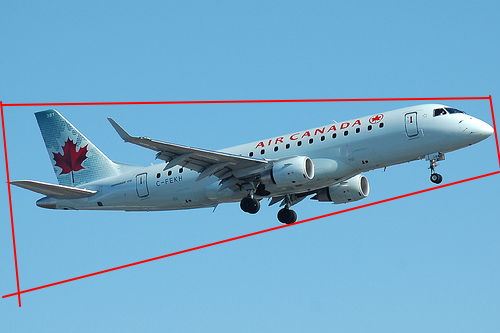

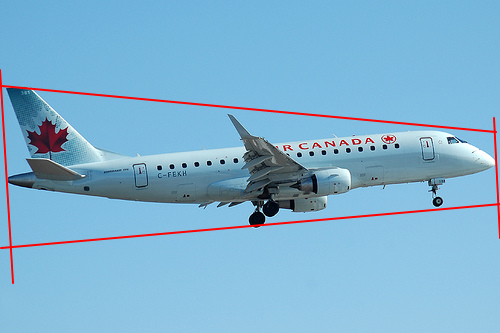

# 일단 원본 이미지에 원본 bounding box를 그려봅니다

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

colab_env = True

try:
    from google.colab.patches import cv2_imshow
except:
    colab_env = False

image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_PLAIN , 3, (0,0,0))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 이번에는 perspective transform 적용한 이미지에 원본 bounding box를 그려봅니다
- 먼저 perspective transform matrix를 먼저 구합니다

In [ ]:
import cv2
import numpy as np

pa = np.float32([[0,105], [489, 98], [503, 171], [19, 293]])
pb = np.float32([[0,85], [496,132], [498,204], [10,247]])

matrix = cv2.getPerspectiveTransform(pa, pb)
display(matrix)

# 이미지만 transform 시키고 그 위에 transform 이전의 ground truth를 그립니다

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape


pa = np.float32([[0,105], [489, 98], [503, 171], [19, 293]])
pb = np.float32([[0,85], [496,132], [498,204], [10,247]])

matrix = cv2.getPerspectiveTransform(pa, pb)
image = cv2.warpPerspective(image, matrix, (width, height))

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 꼬리쪽이 잘렸네요
- annotation 에도 perspective transform을 적용합시다
- warpPerspective 가 아니라 perspectiveTransform 을 씁니다. 무엇이 다른가요?
  - wapPerspective: 이미지 array
  - perspectiveTransform: 4 points


In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape
image = cv2.warpPerspective(image, matrix, (width, height))

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        
        # numpy array를 쓸거니까 y부터 서술해서 4개의 꼭지점을 구성합니다
        p0 = [xmin, ymin]
        p1 = [xmax, ymin]
        p2 = [xmax, ymax]
        p3 = [xmin, ymax]
        
        org_coordinates = np.float32([p0, p1, p2, p3])        
                
        # 4개의 꼭지점을 reshape 하는 이유는 뭘까요?
        new_coordinates = cv2.perspectiveTransform(org_coordinates.reshape(-1,1,2), matrix).reshape(org_coordinates.shape)
        
        print(org_coordinates.shape)
        print(org_coordinates)
        print(new_coordinates)        
        
        # 3항 연산자는 왜 쓰는걸까요?
        xmin = int(new_coordinates[0][0]) if new_coordinates[0][0] < new_coordinates[3][0] else int(new_coordinates[3][0]) 
        ymin = int(new_coordinates[0][1]) if new_coordinates[0][1] < new_coordinates[1][1] else int(new_coordinates[1][1]) 
        xmax = int(new_coordinates[1][0]) if new_coordinates[1][0] > new_coordinates[2][0] else int(new_coordinates[2][0]) 
        ymax = int(new_coordinates[2][1]) if new_coordinates[2][1] > new_coordinates[3][1] else int(new_coordinates[3][1]) 
        
        # 아래 구문은 왜 존재할까요? labelImg 오픈소스의 yolo_line_to_shape 함수를 다시 확인해봅시다
        xmin = 0 if xmin < 0 else xmin
        ymin = 0 if ymin < 0 else ymin
        xmax = width if xmax > width else xmax
        ymax = height if ymax > height else ymax
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 결과가 어떤가요?
- bounding box가 ground truth를 유지하고 있나요?
- 시각화 효과를 위해 skew를 좀 더 가해봅시다
- 상승중인 비행기를 하강으로 변경해보겠습니다

In [ ]:
import cv2
import numpy as np

pa = np.float32([[0,105], [489, 98], [503, 171], [19, 293]])
pb = np.float32([[145,33], [433,230], [389,270], [28,109]])

matrix = cv2.getPerspectiveTransform(pa, pb)
display(matrix)

- 이제 위의 matrix로 transform된 이미지를 그려봅니다
- 이 때 ground truth는 기존 값을 일단 유지해봅시다

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape


pa = np.float32([[0,105], [489, 98], [503, 171], [19, 293]])
pb = np.float32([[145,33], [433,230], [389,270], [28,109]])

matrix = cv2.getPerspectiveTransform(pa, pb)
image = cv2.warpPerspective(image, matrix, (width, height))

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 확실한 불편함이 느껴지네요

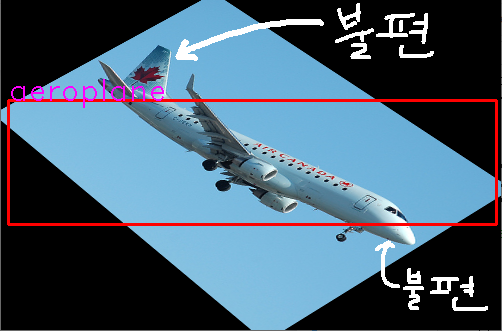

## 이제 bounding box 에도 perspective transform을 적용합시다

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape
image = cv2.warpPerspective(image, matrix, (width, height))

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)        
        
        # numpy array를 쓸거니까 y부터 서술해서 4개의 꼭지점을 구성합니다
        p0 = [xmin, ymin]
        p1 = [xmax, ymin]
        p2 = [xmax, ymax]
        p3 = [xmin, ymax]
        
        org_coordinates = np.float32([p0, p1, p2, p3])        
                
        # 4개의 꼭지점을 reshape 하는 이유는 뭘까요?
        new_coordinates = cv2.perspectiveTransform(org_coordinates.reshape(-1,1,2), matrix).reshape(org_coordinates.shape)
        
        print(org_coordinates.shape)
        print(org_coordinates)
        print(new_coordinates)        
        
        # 3항 연산자는 왜 쓰는걸까요?
        xmin = int(new_coordinates[0][0]) if new_coordinates[0][0] < new_coordinates[3][0] else int(new_coordinates[3][0]) 
        ymin = int(new_coordinates[0][1]) if new_coordinates[0][1] < new_coordinates[1][1] else int(new_coordinates[1][1]) 
        xmax = int(new_coordinates[1][0]) if new_coordinates[1][0] > new_coordinates[2][0] else int(new_coordinates[2][0]) 
        ymax = int(new_coordinates[2][1]) if new_coordinates[2][1] > new_coordinates[3][1] else int(new_coordinates[3][1]) 
        
        # 아래 구문은 왜 존재할까요?
        xmin = 0 if xmin < 0 else xmin
        ymin = 0 if ymin < 0 else ymin
        xmax = width if xmax > width else xmax
        ymax = height if ymax > height else ymax
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 결과가 어떤가요?
- 아까보다는 나은가요?
- ground trugh가 완전히 보정이 되었나요?
- 그렇지 않다면 왜 그런걸까요?


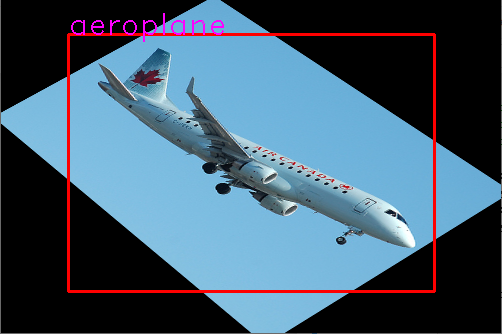

# 아래 행렬을 사용해볼까요?
- 이 행렬은 어떻게 나온걸까요?
- bounding box 영역만 볼 때 잘 변환된 것 같나요? 왜그럴까요?
  - 이 변환에는 bounding box의 회전이 없습니다
  - 위 그림을 다시한번 보면 배경의 4개 꼭지점이 잘린것이 보이나요?
  - 배경 전체영역을 또하나의 bounding box라고 보면 변환 전후로 배경의 bounding box영역이 커진것이 되겠네요

In [ ]:
import cv2
import numpy as np

pa = np.float32([[6,103], [495, 103], [495, 230], [6, 230]])
pb = np.float32([[96,48], [414,49], [414,249], [95,248]])

matrix = cv2.getPerspectiveTransform(pa, pb)
display(matrix)

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_006619.jpg')
height, width, channel = image.shape
image = cv2.warpPerspective(image, matrix, (width, height))

with open ('/content/VOCdevkit/VOC2012/Annotations/2008_006619.xml', 'r', encoding='utf8') as xml:

    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        
        # numpy array를 쓸거니까 y부터 서술해서 4개의 꼭지점을 구성합니다
        p0 = [xmin, ymin]
        p1 = [xmax, ymin]
        p2 = [xmax, ymax]
        p3 = [xmin, ymax]
        
        org_coordinates = np.float32([p0, p1, p2, p3])        
                
        # 4개의 꼭지점을 reshape 하는 이유는 뭘까요?
        new_coordinates = cv2.perspectiveTransform(org_coordinates.reshape(-1,1,2), matrix).reshape(org_coordinates.shape)
        
        print(org_coordinates.shape)
        print(org_coordinates)
        print(new_coordinates)        
        
        # 3항 연산자는 왜 쓰는걸까요?
        xmin = int(new_coordinates[0][0]) if new_coordinates[0][0] < new_coordinates[3][0] else int(new_coordinates[3][0]) 
        ymin = int(new_coordinates[0][1]) if new_coordinates[0][1] < new_coordinates[1][1] else int(new_coordinates[1][1]) 
        xmax = int(new_coordinates[1][0]) if new_coordinates[1][0] > new_coordinates[2][0] else int(new_coordinates[2][0]) 
        ymax = int(new_coordinates[2][1]) if new_coordinates[2][1] > new_coordinates[3][1] else int(new_coordinates[3][1]) 
        
        # 아래 구문은 왜 존재할까요?
        xmin = 0 if xmin < 0 else xmin
        ymin = 0 if ymin < 0 else ymin
        xmax = width if xmax > width else xmax
        ymax = height if ymax > height else ymax
        
        image = cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

        
if colab_env:
    cv2_imshow(image)

else:
    cv2.imshow('aeroplains', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 2주차에 했던 버스 이미지를 다시 변환해봅시다
- 이번에는 라벨링 파일도 함께 변환하는 것입니다
- 변환 전후의 좌표는 2주차때 했던 좌표 그대로 제시됩니다
```
원본: [[104,97], [430, 3], [432, 336], [87, 247]]
변환 후: [[0,0], [430,0], [430,300], [0,300]]
```

### 원본 이미지 경로
```
VOCdevkit/VOC2012/JPEGImages/2008_003141.jpg
```

In [ ]:
import cv2
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree


# 원본 이미지를 불러옵니다
image = cv2.imread('/content/VOCdevkit/VOC2012/JPEGImages/2008_003141.jpg')
height, width, channel = image.shape

# 원본 이미지를 그리기 위해 별도로 복사합니다
org_image = image.copy()

# 원본 이미지에 원본 라벨링 영역을 그립니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2008_003141.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        org_image = cv2.rectangle(org_image, (xmin, ymin), (xmax, ymax), (0,0,255), 2)        
        cv2.putText(org_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))
    

# 원본 이미지를 화면에 표시합니다
if colab_env:
    cv2_imshow(org_image)

else:
    cv2.imshow('aeroplains', org_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#####################
# 이곳을 채워봅시다 #
#####################
pa = np.float32()
pb = np.float32()

#####################
# 이곳을 채워봅시다 #
#####################
matrix = cv2.getPerspectiveTransform()

#####################
# 이곳을 채워봅시다 #
#####################
new_image = cv2.warpPerspective()

# transform 된 이미지에 라벨링 영역을 그립니다
with open ('/content/VOCdevkit/VOC2012/Annotations/2008_003141.xml', 'r', encoding='utf8') as xml:
    tree = Et.parse(xml)
    
    root = tree.getroot()

    objects = root.findall("object")
    for _object in objects:
        name = _object.find("name").text
        bndbox = _object.find("bndbox") 
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        
        #####################
        # 이곳을 채워봅시다 #
        #####################
        p0 = []
        p1 = []
        p2 = []
        p3 = []
        
        #####################
        # 이곳을 채워봅시다 #
        #####################
        org_coordinates = np.float32()        
                
        #####################
        # 이곳을 채워봅시다 #
        #####################
        new_coordinates = cv2.perspectiveTransform().reshape()
     
        
        # 3항 연산자는 왜 쓰는걸까요?
        xmin = int(new_coordinates[0][0]) if new_coordinates[0][0] < new_coordinates[3][0] else int(new_coordinates[3][0]) 
        ymin = int(new_coordinates[0][1]) if new_coordinates[0][1] < new_coordinates[1][1] else int(new_coordinates[1][1]) 
        xmax = int(new_coordinates[1][0]) if new_coordinates[1][0] > new_coordinates[2][0] else int(new_coordinates[2][0]) 
        ymax = int(new_coordinates[2][1]) if new_coordinates[2][1] > new_coordinates[3][1] else int(new_coordinates[3][1]) 
        
        # 아래 구문은 왜 존재할까요?
        xmin = 0 if xmin < 0 else xmin
        ymin = 0 if ymin < 0 else ymin
        xmax = width if xmax > width else xmax
        ymax = height if ymax > height else ymax
        
        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), (0,0,256), 2)
        
        cv2.putText(new_image, name, (xmin, ymin), cv2.FONT_HERSHEY_DUPLEX , 1, (255,0,255))

# transform된 이미지와 라벨링 영역을 화면에 표시합니다  
if colab_env:
    cv2_imshow(new_image)

else:
    cv2.imshow('aeroplains', new_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()